## Business Problem


### Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of cluster

#### Data collection and description

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
data = pd.read_excel("C:\\Users\Admin\Downloads\\EastWestAirlines.xlsx",sheet_name = 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df=data.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# data.drop(['ID#'], axis =1, inplace = True)

In [6]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
# Normalization function 
def min_max(i):
    x = ((i-i.min())/(i.max()-i.min()))
    return(x)

In [8]:
norm =  min_max(data.iloc[:,1:])

### Hierarchical Clustring

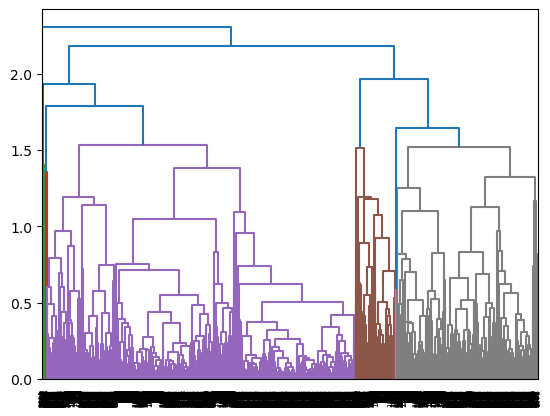

In [9]:
# Createing dendrogram
dendrogram = sch.dendrogram(sch.linkage(norm ,method = 'complete'))

In [10]:
# create clusters &
# save clusters for chart
clust = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit_predict(norm)
clust

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [11]:
cluster = pd.DataFrame(clust, columns = ['Clusters'])
cluster.head()

,Clusters
0,0
1,0
2,0
3,0
4,1


In [12]:
df['Cluster_id_hierarchical'] = cluster
data['Cluster_id_hierarchical'] = cluster
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_hierarchical
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [13]:
data.groupby('Cluster_id_hierarchical').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster_id_hierarchical,,,,,,,,,,,,
0,2171.213381,59791.056611,88.188836,1.703484,1.018606,1.011085,10324.882423,9.192003,230.441013,0.672209,3824.887965,0.003167
1,1106.516923,157084.578462,208.673846,4.661538,1.000000,1.061538,70477.086154,23.249231,1019.433846,3.196923,5770.572308,1.000000
2,1923.643357,80173.963287,248.550699,2.104895,1.009615,1.000874,16882.864510,13.412587,739.958916,2.236888,4304.383741,1.000000
3,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000


In [14]:
data.drop('Cluster_id_hierarchical', axis = 1, inplace = True)

## K - Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[1830.7932128584107, 823.6756984125209, 625.1768205797015, 436.7088576193257, 348.943321725414, 315.151064311745, 287.7292539940173, 263.04996130391567, 243.91664703659052, 228.48943200048834]


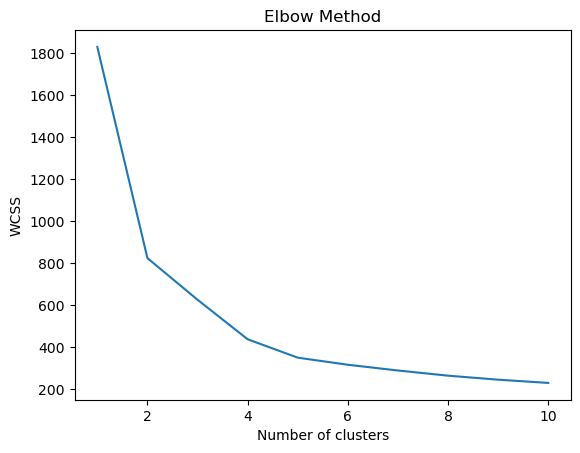

In [17]:
import matplotlib.pyplot as plt
print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(norm)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=0)

In [19]:
clusters_new.labels_

array([1, 1, 1, ..., 2, 1, 1])

In [20]:
df['Clusters_id_kmeans'] = clusters_new.labels_
data['Clusters_id_kmeans'] = clusters_new.labels_ 
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_id_kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [21]:
data.groupby('Clusters_id_kmeans').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_id_kmeans,,,,,,,,,,,,
0,1904.763744,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,2284.375857,40747.617290,92.345809,1.092778,1.017923,1.004217,3335.152873,6.488666,226.599895,0.658935,3619.111755,0.0
2,1613.016089,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,1833.460548,118032.061192,73.112721,3.576490,1.001610,1.022544,31282.666667,17.251208,225.352657,0.632850,4436.307568,0.0


In [22]:
data.drop('Clusters_id_kmeans', axis = 1, inplace = True)

## DBSCAN

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [24]:
# Normalization function 
scaler = StandardScaler()
std = scaler.fit_transform(data)
std

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [25]:
dbscan = DBSCAN(eps=2, min_samples=10)
dbscan.fit_predict(std)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [26]:
#Noisy samples are given the label -1 and others are clusters.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
df['Clusters_id_DBSCAN'] = dbscan.labels_ 
data['Clusters_id_DBSCAN'] = dbscan.labels_ 
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters_id_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [28]:
data.groupby('Clusters_id_DBSCAN').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_id_DBSCAN,,,,,,,,,,,,
-1,1705.919231,219227.626923,1506.861538,2.657692,1.161538,1.188462,46380.661538,25.065385,3157.869231,9.207692,4757.519231,0.734615
0,2177.128237,57536.474312,32.782162,1.694616,1.000000,1.000000,9752.446774,8.864776,186.642828,0.546650,3811.589396,0.000000
1,1766.324806,74975.804651,81.217829,2.640310,1.000000,1.000000,25293.439535,14.027132,435.089147,1.361240,4576.269767,1.000000
2,2388.250000,39218.500000,0.000000,1.000000,2.000000,1.000000,9189.250000,13.500000,209.375000,0.812500,3511.187500,0.000000


In [29]:
# Now here, values of all types of method for clustering with data  
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_hierarchical,Clusters_id_kmeans,Clusters_id_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,1,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1,2,1


# Q.2

## Business Problem


### Perform clustering for the crime data and identify the number of clusters formed and inferences

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [31]:
data = pd.read_csv("C:\\Users\Admin\Downloads\\crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [32]:
df=data.copy()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [34]:
data.drop(['Unnamed: 0'], axis =1, inplace = True)

In [35]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [36]:
# Normalization function 
def min_max(i):
    x = ((i-i.min())/(i.max()-i.min()))
    return(x)

In [37]:
norm =  min_max(data.iloc[:,:])

## Hierarchical Clustring

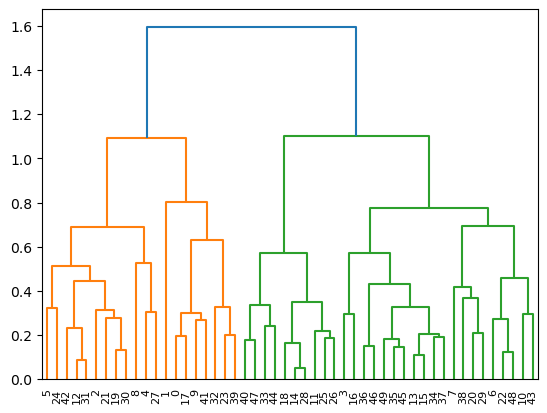

In [38]:
# Createing dendrogram
dendrogram = sch.dendrogram(sch.linkage(norm ,method = 'complete'))

In [39]:
# create clusters &
# save clusters for chart
clust = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete').fit_predict(norm)
clust

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [40]:
cluster = pd.DataFrame(clust, columns = ['Clusters'])
cluster.head()

,Clusters
0,0
1,0
2,3
3,1
4,3


In [41]:
df['Cluster_id_hierarchical'] = cluster
data['Cluster_id_hierarchical'] = cluster
data.head()

,Murder,Assault,UrbanPop,Rape,Cluster_id_hierarchical
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,3
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,3


In [42]:
data.groupby('Cluster_id_hierarchical').mean()

,Murder,Assault,UrbanPop,Rape
Cluster_id_hierarchical,,,,
0,14.087500,252.750000,53.500000,24.5375
1,5.715000,132.300000,70.800000,18.1000
2,3.180000,78.700000,49.300000,11.6300
3,10.883333,256.916667,78.333333,32.2500


In [43]:
data.drop('Cluster_id_hierarchical', axis = 1, inplace = True)

## K - Means

In [44]:
from sklearn.cluster import KMeans

In [45]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm)
    wcss.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[13.184122550256445, 6.596893867946198, 5.010878493006418, 3.6834561535859143, 3.191135706858945, 2.8460823177953527, 2.5791674343188404, 2.3083729086066023, 2.1024429823765876, 1.7860840007668635]


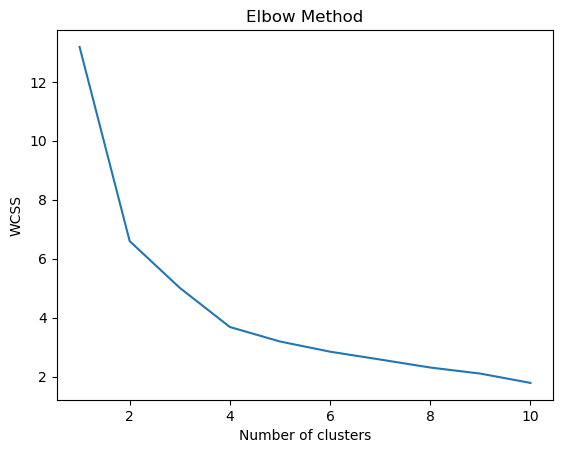

In [46]:
import matplotlib.pyplot as plt
print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [47]:
#Build Cluster algorithm
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(norm)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [48]:
clusters_new.labels_

array([3, 0, 0, 3, 0, 0, 1, 1, 0, 3, 1, 2, 0, 1, 2, 1, 2, 3, 2, 0, 1, 0,
       2, 3, 1, 2, 2, 0, 2, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 3, 2, 3, 0, 1,
       2, 1, 1, 2, 2, 1])

In [49]:
df['Clusters_id_kmeans'] = clusters_new.labels_
data['Clusters_id_kmeans'] = clusters_new.labels_ 
data.head()

,Murder,Assault,UrbanPop,Rape,Clusters_id_kmeans
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,3
4,9.0,276,91,40.6,0


In [50]:
data.groupby('Clusters_id_kmeans').mean()

,Murder,Assault,UrbanPop,Rape
Clusters_id_kmeans,,,,
0,10.966667,264.000000,76.500000,33.608333
1,5.852941,141.176471,73.647059,19.335294
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


In [51]:
data.drop('Clusters_id_kmeans', axis = 1, inplace = True)

In [52]:
# data['Clusters_id']=data['Clusters_id'].replace(0, 'Cluster 1')
# data['Clusters_id']=data['Clusters_id'].replace(1, 'Cluster 2')
# data['Clusters_id']=data['Clusters_id'].replace(2, 'Cluster 3')
# data['Clusters_id']=data['Clusters_id'].replace(3, 'Cluster 4')
# data['Clusters_id']=data['Clusters_id'].replace(4, 'Cluster 5')
# data['Clusters_id']=data['Clusters_id'].replace(5, 'Cluster 6')
# data

## DBSCAN

In [53]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [54]:
# Normalization function 
scaler = StandardScaler()
std = scaler.fit_transform(data)
std

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [55]:
dbscan = DBSCAN(eps=1.8, min_samples=10)
dbscan.fit_predict(std)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [56]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [57]:
df['Clusters_id_DBSCAN'] = dbscan.labels_ 
data['Clusters_id_DBSCAN'] = dbscan.labels_ 
data.head()

,Murder,Assault,UrbanPop,Rape,Clusters_id_DBSCAN
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,0


In [58]:
# Now here, values of all types of method for clustering with data  
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster_id_hierarchical,Clusters_id_kmeans,Clusters_id_DBSCAN
0,Alabama,13.2,236,58,21.2,0,3,0
1,Alaska,10.0,263,48,44.5,0,0,-1
2,Arizona,8.1,294,80,31.0,3,0,0
3,Arkansas,8.8,190,50,19.5,1,3,0
4,California,9.0,276,91,40.6,3,0,0


#### Conclusion
1.- Analysing Murder and Assault variables shows a clearer connections between them. Higher the murder rates in a city higher the Assault and vice versa.

2- Countrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlations are visible, but low murder rates in a city seen to indicate lower number of rapes and vice versa.

3- As with murder and assault, also rates of rape and assault show clearer correlations

​